<a href="https://colab.research.google.com/github/jihankaruniaa/PCVK_Ganjil_2024/blob/main/Kuis_2_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Library

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

## Augmentasi Data dan Preprocessing

In [ ]:
# Direktori Dataset
train_dir = "/content/drive/MyDrive/dataset/train"
val_dir = "/content/drive/MyDrive/dataset/val"

# Augmentasi Data (Data Augmentation)
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255)

# Generator untuk Pelatihan dan Validasi
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

Found 661 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


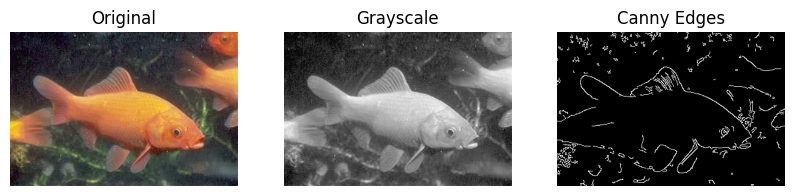

In [ ]:
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)  # Deteksi tepi dengan Canny

    # Tampilkan hasil
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original"), plt.axis("off")
    plt.subplot(1, 3, 2), plt.imshow(gray, cmap='gray')
    plt.title("Grayscale"), plt.axis("off")
    plt.subplot(1, 3, 3), plt.imshow(edges, cmap='gray')
    plt.title("Canny Edges"), plt.axis("off")
    plt.show()

# Contoh: Berikan path ke gambar sample
preprocess_image("/content/drive/MyDrive/dataset/train/goldfish/03UJQXPI2VCN.jpg")


## Build Model

In [ ]:
# Mendefinisikan arsitektur model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')  # 3 kelas: goldfish, mosquitofish, others
])

# Mengompilasi model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,027 (12.61 MB)

 Trainable params: 3,305,027 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

## Training Model

In [ ]:
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator
)


Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 370s 13s/step - accuracy: 0.4760 - loss: 1.0864 - val_accuracy: 0.6667 - val_loss: 0.5353
Epoch 2/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.6933 - loss: 0.6257 - val_accuracy: 0.7333 - val_loss: 0.4674
Epoch 3/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.7134 - loss: 0.5636 - val_accuracy: 0.7500 - val_loss: 0.5415
Epoch 4/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.7433 - loss: 0.5118 - val_accuracy: 0.7333 - val_loss: 0.4764
Epoch 5/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.7537 - loss: 0.4895 - val_accuracy: 0.7333 - val_loss: 0.3857
Epoch 6/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.8142 - loss: 0.4165 - val_accuracy: 0.7000 - val_loss: 0.4625
Epoch 7/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.8138 - loss: 0.4525 - val_accuracy: 0.7833 - val_loss: 0.3985
Epoch 8/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.8174 - loss: 0.4050 - val_accuracy: 0.7833 - val_loss: 0.4122
E

In [ ]:
model.save('/content/drive/MyDrive/modelkuispcvk.h5')

Training Accuracy: 86.99%
Validation Accuracy: 73.33%


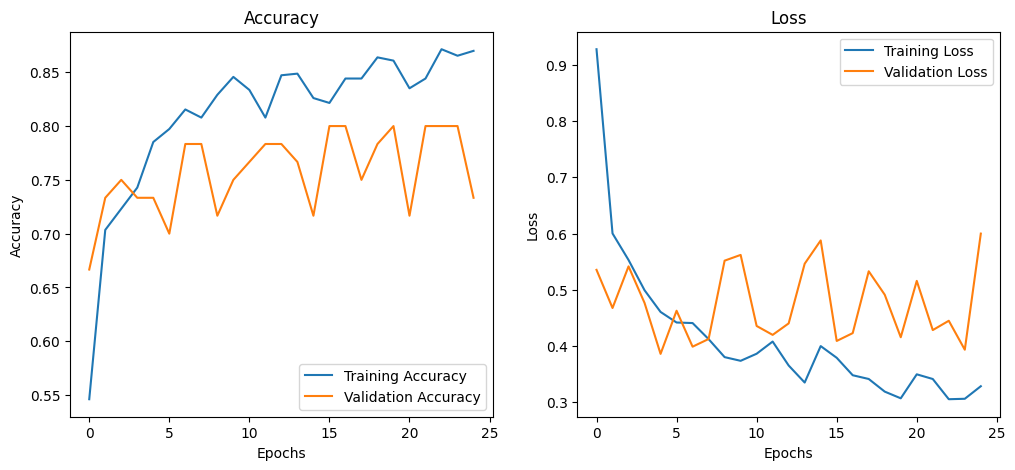

In [ ]:
# Menampilkan grafik akurasi pelatihan dan validasi
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

final_train_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]
print(f"Training Accuracy: {final_train_accuracy * 100:.2f}%")
print(f"Validation Accuracy: {final_val_accuracy * 100:.2f}%")

plt.show()

## PREDIKSI

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Saving gold fish-1.jpg to gold fish-1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
Probabilitas per kelas:
goldfish: 100.00%
mosquitofish: 0.00%
others: 0.00%

Prediksi Terakhir: goldfish
Probabilitas: 100.00%


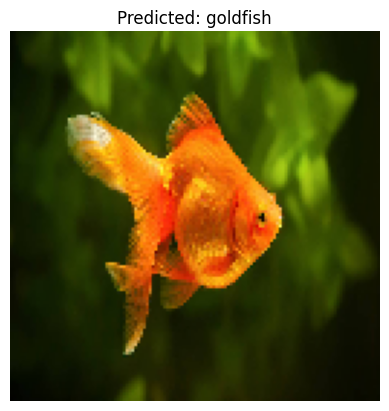

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.models import load_model

# Memuat model yang sudah disimpan
model = load_model('/content/drive/MyDrive/modelkuispcvk.h5')

def predict_new_image():
    uploaded = files.upload()
    for img_name in uploaded.keys():
        # Preprocess image
        img = tf.keras.utils.load_img(img_name, target_size=(128, 128))
        img_array = tf.keras.utils.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Melakukan prediksi menggunakan model yang sudah dimuat
        prediction = model.predict(img_array)
        class_names = ['goldfish', 'mosquitofish', 'others']

        # Menampilkan probabilitas untuk setiap kelas
        print("Probabilitas per kelas:")
        for i, class_name in enumerate(class_names):
            print(f"{class_name}: {prediction[0][i] * 100:.2f}%")

        # Menampilkan kelas prediksi dengan probabilitas tertinggi
        predicted_class = class_names[np.argmax(prediction)]
        prediction_prob = np.max(prediction)

        # Display results
        print(f"\nPrediksi Terakhir: {predicted_class}")
        print(f"Probabilitas: {prediction_prob * 100:.2f}%")
        plt.imshow(img)
        plt.title(f"Predicted: {predicted_class}")
        plt.axis("off")
        plt.show()

predict_new_image()

Saving mosquitofish-2.jpg to mosquitofish-2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Probabilitas per kelas:
goldfish: 0.05%
mosquitofish: 83.63%
others: 16.31%

Prediksi Terakhir: mosquitofish
Probabilitas: 83.63%


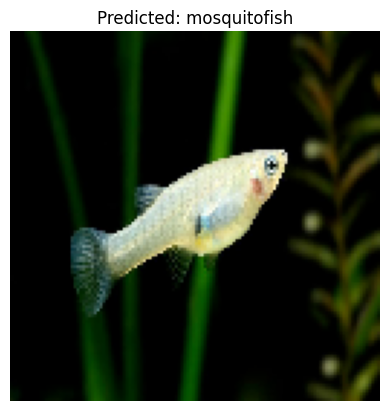

In [ ]:
predict_new_image()

Saving cherry barb.jpg to cherry barb.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Probabilitas per kelas:
goldfish: 0.00%
mosquitofish: 1.31%
others: 98.69%

Prediksi Terakhir: others
Probabilitas: 98.69%


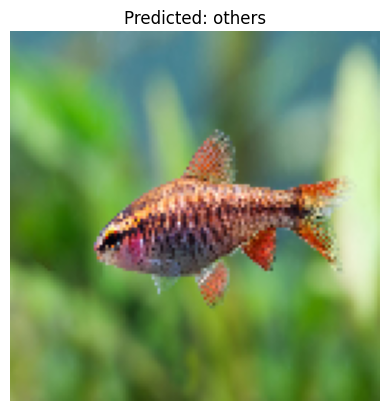

In [ ]:
predict_new_image()

## PREDIKSI DENGAN SUARA

In [ ]:
!pip install gTTS

Saving gold fish-2.webp to gold fish-2.webp
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Probabilitas per kelas:
goldfish: 100.00%
mosquitofish: 0.00%
others: 0.00%

Prediksi Terakhir: goldfish
Probabilitas: 100.00%


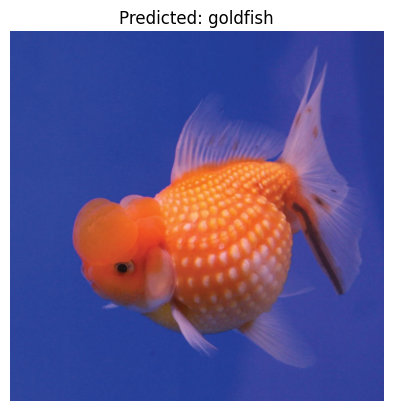

In [ ]:
from google.colab import files
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.models import load_model
from gtts import gTTS
import os
from IPython.display import Audio

# Memuat model yang sudah disimpan
model = load_model('/content/drive/MyDrive/modelkuispcvk.h5')

# Fungsi untuk memprediksi gambar dan menghasilkan suara
def predict_new_image():
    uploaded = files.upload()
    for img_name in uploaded.keys():
        # Preprocess image
        img = tf.keras.utils.load_img(img_name, target_size=(128, 128))
        img_array = tf.keras.utils.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Melakukan prediksi menggunakan model yang sudah dimuat
        prediction = model.predict(img_array)
        class_names = ['goldfish', 'mosquitofish', 'others']

        # Menampilkan probabilitas untuk setiap kelas
        print("Probabilitas per kelas:")
        for i, class_name in enumerate(class_names):
            print(f"{class_name}: {prediction[0][i] * 100:.2f}%")

        # Menampilkan kelas prediksi dengan probabilitas tertinggi
        predicted_class = class_names[np.argmax(prediction)]
        prediction_prob = np.max(prediction)

        # Display results
        print(f"\nPrediksi Terakhir: {predicted_class}")
        print(f"Probabilitas: {prediction_prob * 100:.2f}%")

        # Display the image
        img = Image.open(img_name)
        plt.imshow(img)
        plt.title(f"Predicted: {predicted_class}")
        plt.axis("off")
        plt.show()

       # Menentukan teks berdasarkan kelas yang diprediksi
        if predicted_class == 'others':
            text_to_speak = "Gambar tersebut bukan dari kedua kelas ikan yang di deteksi (gold fish maupun mosquito fish)."
        else:
            text_to_speak = f"Gambar ikan tersebut adalah {predicted_class}."

        # Mengonversi teks ke suara menggunakan gTTS
        tts = gTTS(text_to_speak, lang='id')
        # Menyimpan file audio sementara
        audio_file = '/content/prediction.mp3'
        tts.save(audio_file)

        # Memutar suara
        display(Audio(audio_file))

predict_new_image()

Saving images (1).jpeg to images (1).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Probabilitas per kelas:
goldfish: 0.08%
mosquitofish: 69.21%
others: 30.71%

Prediksi Terakhir: mosquitofish
Probabilitas: 69.21%


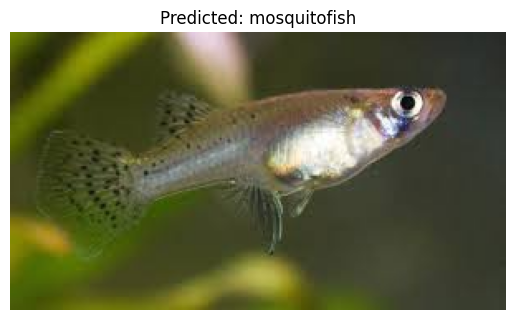

In [ ]:
predict_new_image()

Saving Mujair.jpeg to Mujair.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Probabilitas per kelas:
goldfish: 1.95%
mosquitofish: 1.37%
others: 96.67%

Prediksi Terakhir: others
Probabilitas: 96.67%


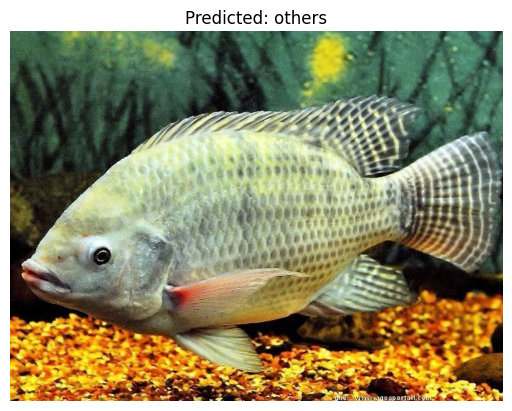

In [ ]:
predict_new_image()

Saving Louhan.jpg to Louhan.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Probabilitas per kelas:
goldfish: 0.00%
mosquitofish: 2.86%
others: 97.14%

Prediksi Terakhir: others
Probabilitas: 97.14%


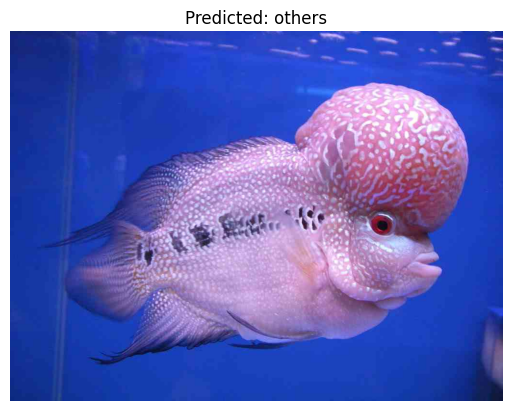

In [ ]:
predict_new_image()

Saving gold fish-3.jpg to gold fish-3.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Probabilitas per kelas:
goldfish: 100.00%
mosquitofish: 0.00%
others: 0.00%

Prediksi Terakhir: goldfish
Probabilitas: 100.00%


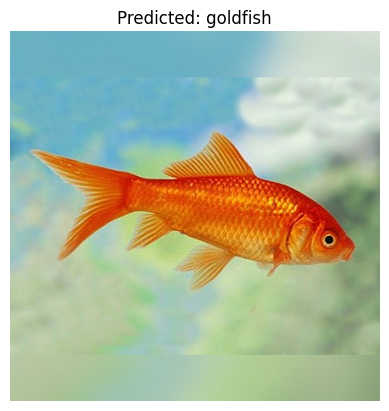

In [ ]:
predict_new_image()

Saving gold.jpg to gold.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Probabilitas per kelas:
goldfish: 99.86%
mosquitofish: 0.03%
others: 0.12%

Prediksi Terakhir: goldfish
Probabilitas: 99.86%


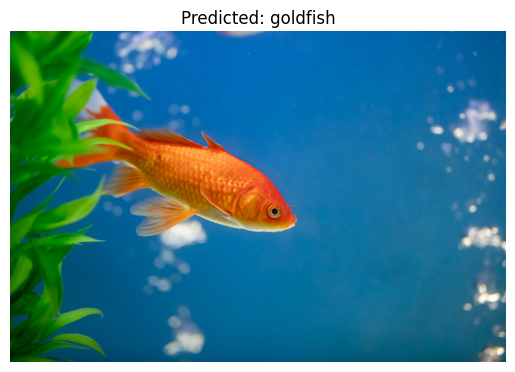

In [ ]:
predict_new_image()

Saving cherry barb.jpg to cherry barb (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Probabilitas per kelas:
goldfish: 0.00%
mosquitofish: 1.31%
others: 98.69%

Prediksi Terakhir: others
Probabilitas: 98.69%


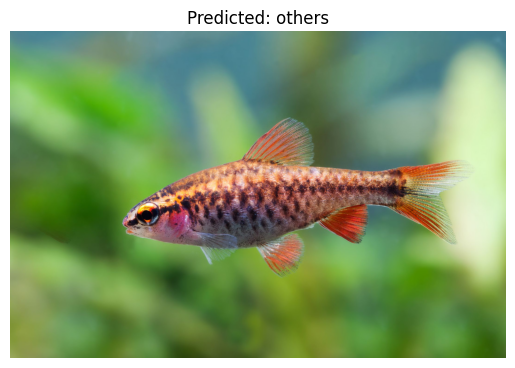

In [ ]:
predict_new_image()

Saving mosquitofish-2.jpg to mosquitofish-2 (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Probabilitas per kelas:
goldfish: 0.05%
mosquitofish: 83.63%
others: 16.31%

Prediksi Terakhir: mosquitofish
Probabilitas: 83.63%


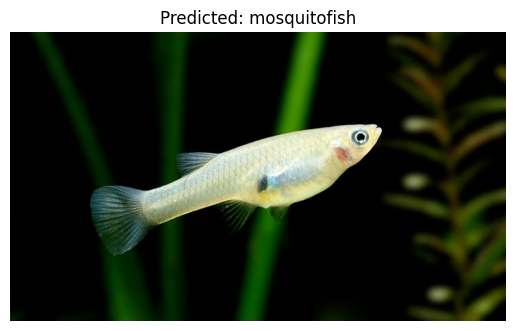

In [ ]:
predict_new_image()